<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
from scipy.stats import ttest_ind, f_oneway, pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
#Display the first few rows of the dataset
print(boston_df.head())

# Display summary statistics of the dataset
print(boston_df.describe())

# Check for missing values
print(boston_df.isnull().sum())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  
       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      

### Task 2: Generate Descriptive Statistics and Visualizations

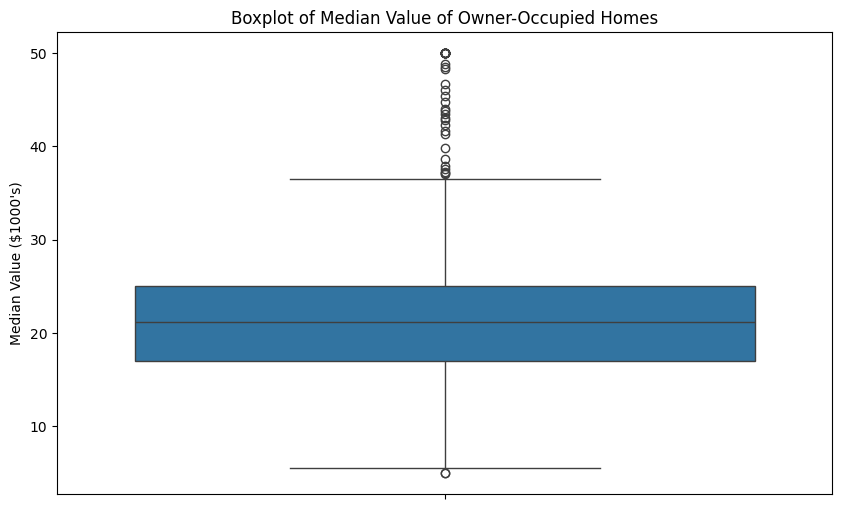

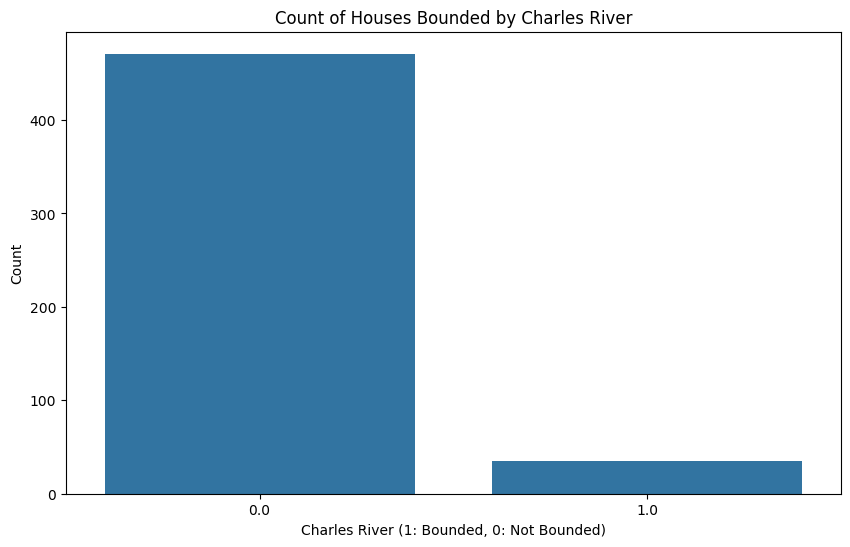

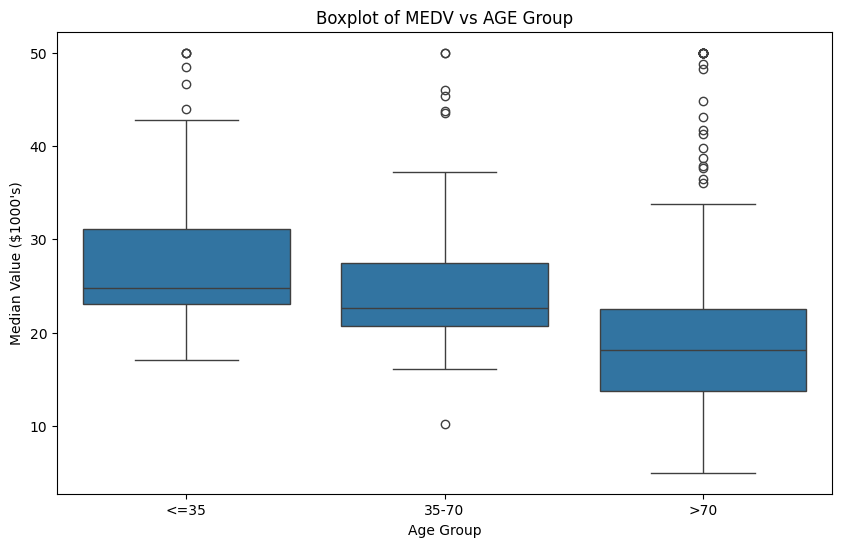

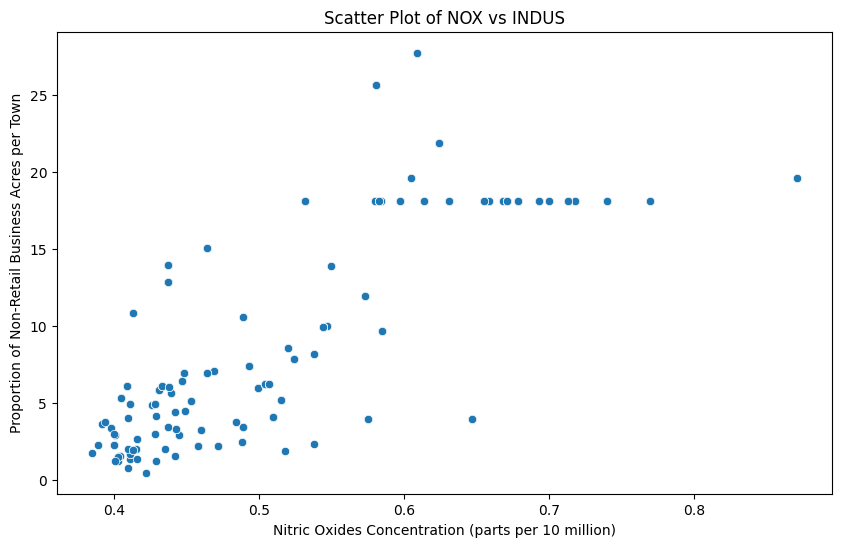

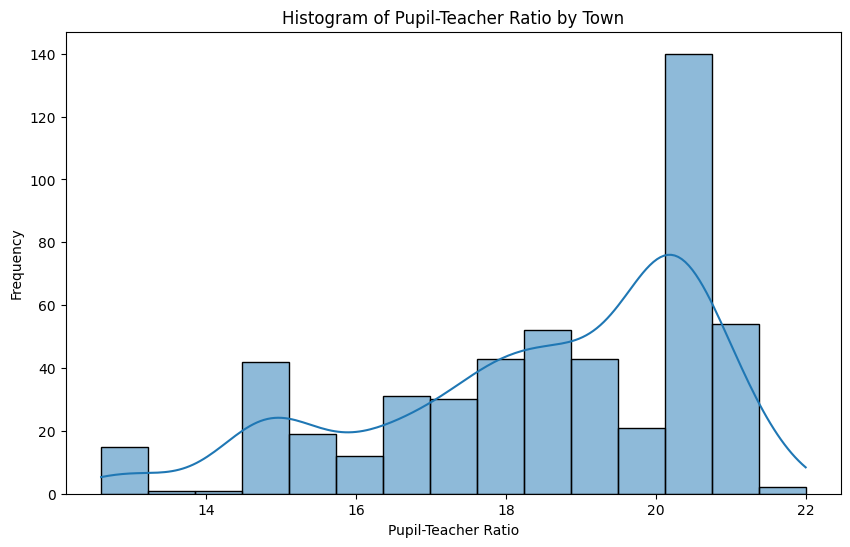

In [6]:
# Boxplot for MEDV
pyplot.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel('Median Value ($1000\'s)')
pyplot.show()

# Explanation:
# The boxplot shows the median value of homes, quartiles, and potential outliers.
# It helps to understand the central tendency and the spread of house prices.

# Bar plot for CHAS
pyplot.figure(figsize=(10, 6))
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Count of Houses Bounded by Charles River')
pyplot.xlabel('Charles River (1: Bounded, 0: Not Bounded)')
pyplot.ylabel('Count')
pyplot.show()

# Explanation:
# This bar plot shows the count of houses that are bounded by the Charles River (CHAS = 1)
# versus those that are not (CHAS = 0). It provides insights into the distribution of this variable.

# Discretize AGE into three groups
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '>70'])

# Boxplot for MEDV vs AGE_GROUP
pyplot.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV vs AGE Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value ($1000\'s)')
pyplot.show()

# Explanation:
# This boxplot compares the median home values across different age groups of houses.
# It provides insights into how the age of buildings impacts home values.

# Scatter plot for NOX vs INDUS
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title('Scatter Plot of NOX vs INDUS')
pyplot.xlabel('Nitric Oxides Concentration (parts per 10 million)')
pyplot.ylabel('Proportion of Non-Retail Business Acres per Town')
pyplot.show()

# Explanation:
# The scatter plot visualizes the relationship between nitric oxide concentrations and
# the proportion of non-retail business acres. It helps to see if there is any correlation between these variables.

# Histogram for PTRATIO
pyplot.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
pyplot.title('Histogram of Pupil-Teacher Ratio by Town')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

# Explanation:
# The histogram shows the distribution of the pupil-teacher ratio across towns.
# It helps to understand the spread and central tendency of this variable.

### Task 3: Use the Appropriate Tests to Answer the Questions

In [7]:
# 1. Significant Difference in Median Value of Houses Bounded by the Charles River (T-test)

# Hypothesis:
# Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles River.
# Alternative Hypothesis (H1): There is a significant difference.

# Separate data into two groups based on CHAS
medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform T-test
t_stat, p_value = ttest_ind(medv_chas1, medv_chas0, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles River.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the median value of houses bounded by the Charles River.")

T-statistic: 3.113291312794837, P-value: 0.003567170098137517
Reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles River.


In [8]:
# 2. Difference in Median Values of Houses by AGE (ANOVA)

# Hypothesis:
# Null Hypothesis (H0): There is no difference in the median values of houses for different age groups.
# Alternative Hypothesis (H1): There is a difference.
# Group data by AGE_GROUP

medv_age_group1 = boston_df[boston_df['AGE_GROUP'] == '<=35']['MEDV']
medv_age_group2 = boston_df[boston_df['AGE_GROUP'] == '35-70']['MEDV']
medv_age_group3 = boston_df[boston_df['AGE_GROUP'] == '>70']['MEDV']

# Perform ANOVA
f_stat, p_value = f_oneway(medv_age_group1, medv_age_group2, medv_age_group3)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis. There is a difference in the median values of houses for different age groups.")
else:
    print("Fail to reject the null hypothesis. There is no difference in the median values of houses for different age groups.")


F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15
Reject the null hypothesis. There is a difference in the median values of houses for different age groups.


In [9]:
# 3. Relationship between NOX and INDUS (Pearson Correlation)

# Hypothesis:
# Null Hypothesis (H0): There is no relationship between NOX and INDUS.
# Alternative Hypothesis (H1): There is a relationship.

# Perform Pearson Correlation
corr, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Correlation coefficient: {corr}, P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis. There is a relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis. There is no relationship between NOX and INDUS.")


Correlation coefficient: 0.7636514469209192, P-value: 7.913361061210442e-98
Reject the null hypothesis. There is a relationship between NOX and INDUS.


In [10]:
# 4. Impact of DIS on MEDV (Regression Analysis)

# Hypothesis:
# Null Hypothesis (H0): DIS has no impact on MEDV.
# Alternative Hypothesis (H1): DIS has an impact.

# Define dependent and independent variables
X = boston_df['DIS']
y = boston_df['MEDV']

# Add constant to predictor variable
X = sm.add_constant(X)

# Perform regression analysis
model = sm.OLS(y, X).fit()
print(model.summary())

# Conclusion
if model.pvalues[1] < 0.05:
    print("Reject the null hypothesis. DIS has an impact on MEDV.")
else:
    print("Fail to reject the null hypothesis. DIS has no impact on MEDV.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        04:30:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0